In [1]:
# Import all necessary libraries and functions.
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed = 42
np.random.seed(seed)

### Carregando a base de dados dos dígitos escritos à mão

In [3]:
X, y = load_digits(return_X_y=True)

### Plotando as 10 primeiras images da base de dados

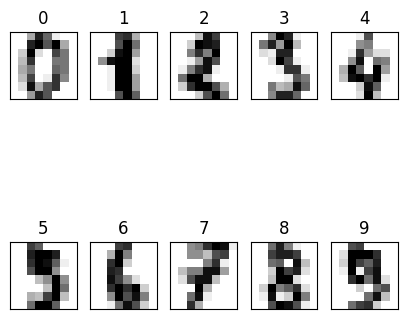

In [4]:
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.binary)
    plt.title(str(i))
plt.show()

### Dividido o conjunto

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Encontrando os melhores hiperparâmetros

In [6]:
# Dictionary with the hyperparameters to be checked.
parameters = {
    'hidden_layer_sizes':[(10,), (20,), (30,), (40,)],
    'activation' : ['logistic', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}

# Instantiate MLPClassifier.
clf = MLPClassifier(max_iter=10000, random_state=seed)

# Instantiate GridSearchCV.
gs = GridSearchCV(clf, parameters, scoring='accuracy', verbose=4, cv=10)

# Train the MLP regressor with grid search.
gs.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.889 total time=  25.3s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.873 total time=  14.9s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.897 total time=  13.3s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.865 total time=   5.9s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.786 total time=  10.5s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.802 total time=  12.8s
[CV 7/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.873 total time=   6.5s
[CV 8/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score=0.864 total time=  11.8s
[CV 9/10] END activation=logistic, hidden_layer_sizes=(10,), solver=lbfgs;, score

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=10000, random_state=42),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=4)

### Melhores hiperparâmetros

In [7]:
print(gs.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}


### Acurácia

In [9]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

acc_train = accuracy_score(y_train_pred, y_train)
acc_test = accuracy_score(y_test_pred, y_test)

print('Accuracy train: ', acc_train)
print('Accuracy test: ', acc_test)

Accuracy train:  0.9952267303102625
Accuracy test:  0.9740740740740741


### Matriz de confusão

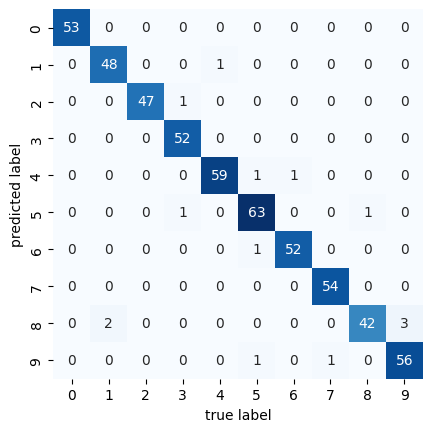

In [10]:
# Plot the confusion matrix.
numberOfClasses = 10
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()